Monte Carlo simulation

In [2]:
import pandas as pd
import numpy as np
from datetime import date
import matplotlib.pyplot as plt
import pandas_datareader.data as web

/Users/programwithus/opt/anaconda3/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [3]:
start = date(2014, 1, 1)
end = date.today()

In [4]:
portfolio = ["AAPL","MSFT","GE","BAC", "VZ"]
data = pd.DataFrame()
for co in portfolio:
    data[co] = web.DataReader(co, 'yahoo', start, end)["Close"]

In [6]:
data.head()

,AAPL,MSFT,GE,BAC,VZ
Date,,,,,
2014-01-02,79.018570,37.160000,26.442308,16.10,49.000000
2014-01-03,77.282860,36.910000,26.423077,16.41,48.419998
2014-01-06,77.704285,36.130001,26.211538,16.66,48.689999
2014-01-07,77.148575,36.410000,26.240385,16.50,49.299999
2014-01-08,77.637146,35.759998,26.163462,16.58,48.500000


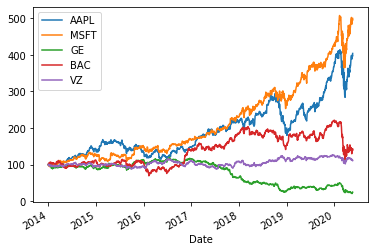

In [7]:
(data/data.iloc[0] * 100).plot();

In [8]:
#Calculating returns
returns = np.log(data/data.shift(1))
returns.tail()

,AAPL,MSFT,GE,BAC,VZ
Date,,,,,
2020-05-14,0.006125,0.004330,-0.015666,0.039460,0.001093
2020-05-15,-0.005930,0.014463,-0.037538,-0.012515,-0.003649
2020-05-18,0.023288,0.009509,0.132848,0.067188,0.018293
2020-05-19,-0.005795,-0.006946,-0.009615,-0.031904,-0.024343
2020-05-20,0.019261,0.010994,0.033257,0.031031,-0.002209


In [9]:
#Mean-variance of returns
#Since we have significant differences in performance, 
#we have to use 252 trading days to annualize the daily returns 
returns.mean() * 252

AAPL    0.219084
MSFT    0.252421
GE     -0.222116
BAC     0.055351
VZ      0.016000
dtype: float64

In [10]:
#Building covariance matrix
returns.cov() * 252

,AAPL,MSFT,GE,BAC,VZ
AAPL,0.076241,0.047001,0.037877,0.043334,0.015265
MSFT,0.047001,0.069750,0.036465,0.045184,0.019898
GE,0.037877,0.036465,0.112335,0.054885,0.019015
BAC,0.043334,0.045184,0.054885,0.095681,0.019850
VZ,0.015265,0.019898,0.019015,0.019850,0.034179


In [11]:
#We assume that we do not open short position and we divide our money equally divided among 5 stocks
#So we generate 5 random numbers and then normalize them so that values would sum up 100% net oper assets
noa = len(portfolio)
weights = np.random.random(noa)
weights /= np.sum(weights)
weights

array([0.08487226, 0.35309747, 0.10735252, 0.03942299, 0.41525477])

In [12]:
#Calculating Expected portfolio return based on the weights
expected_return = np.sum(returns.mean() * weights) * 252
expected_return

0.09270489194231488

In [13]:
#Now lets calculate Expected portfolio variance using our covariance matrix
#we use np.dot -  gets us a product of two matrices
expected_variance = np.dot(weights.T, np.dot(returns.cov() * 252, weights))
expected_variance

0.03412309294048458

In [14]:
#Now we calculate expected standard deviation or volatility 
volatility = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights))) 
volatility

0.18472437018564872

In [15]:
#Monte Carlo simulation to generate random portfolio weight vectors on larger scale
#For every simulated allocation we record the resulting portfolio return and variance
#We assume Risk free is 0
mrets = []
mvols = []
for i in range(2500):
    weights = np.random.random(noa)
    weights /= np.sum(weights)
    mrets.append(np.sum(returns.mean() * weights) * 252)
    mvols.append(np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights ))))

mrets = np.array(mrets)
mvols = np.array(mvols)

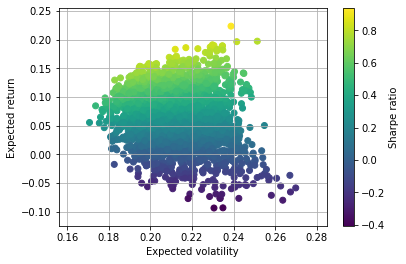

In [16]:
#Lets plot it
plt.figure()
plt.scatter(mvols, mrets, c=mrets / mvols, marker='o')
plt.grid(True)
plt.xlabel('Expected volatility')
plt.ylabel('Expected return')
plt.colorbar(label="Sharpe ratio")
plt.show()